### Problem 05 Programming Assignment

(a) Use the Acceptance-Rejection Method to obtain the samples from distribution Beta(2, 4). You need to plot the pictures of both histogram and the theoretical PDF

We need to calculate the constant in Beta distribution, as it is Beta(2, 4), which is $$\int_0^1\dfrac{x(1 - x)^3}{c}dx = \dfrac{1}{c}\int_0^1x - 3x^2 + 3x^3 - x^4dx = \dfrac{1}{c}\dfrac{1}{20} = 1$$ So we get that $$c = \dfrac{1}{20}$$, then the PDF can be written as $$f = 20x(1 - x)^3$$

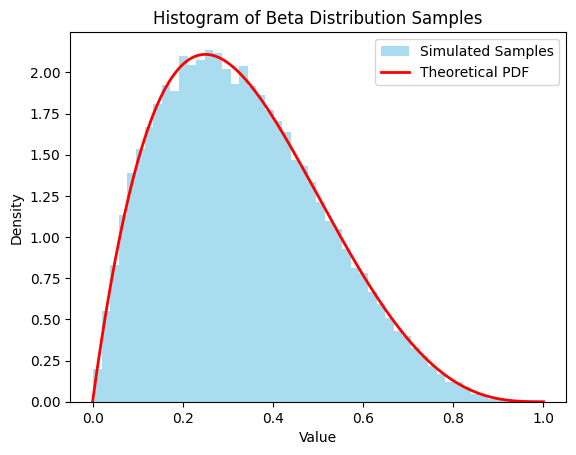

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

n_sim = 100000
a, b = 2, 4
sample_list = []

def beta_2_4_pdf(x):
    return 20 * x * (1 - x)**3

def Uniform_pdf(x, min, max):
    return 1 / (max - min)

# get the constant c where the PDF of uniform distribution is a constant
c = beta_2_4_pdf((a - 1) / (a + b - 2)) / 1

for i in range(n_sim):
    # g is Uniform distribution
    x = np.random.uniform(0, 1)
    # U is Uniform distribution
    U = np.random.uniform(0, 1)
    if U < beta_2_4_pdf(x) / (c * Uniform_pdf(x, 0, 1)):
        sample_list.append(x)

sample_array = np.array(sample_list)

x = np.linspace(0, 1, 200)
pdf = beta_2_4_pdf(x)

plt.hist(sample_array, bins=50, density=True, color="skyblue", alpha=0.7, label="Simulated Samples")
plt.plot(x, pdf, color="red", linewidth=2, label="Theoretical PDF")

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Beta Distribution Samples")
plt.show()

(b) Use the Acceptance-Rejection Method to obtain the samples from the standard Normal distribution N (0, 1). You are required to show the correctness of your algorithm in theory

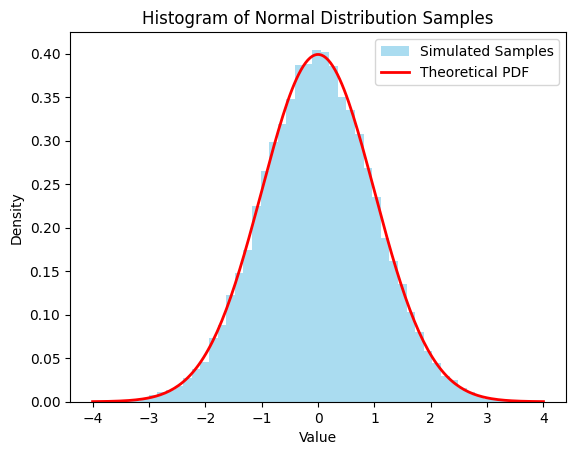

In [39]:
import numpy as np
import matplotlib.pyplot as plt

n_sim = 100000
sample_list = []

# As Normal values from -\infty to +\infty, we use -4 to 4 to cover most of the values
value_range = [-4, 4]

def normal_pdf(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def uniform_pdf(x, min, max):
    return 1 / (max - min)

# the maximum value of normal_pdf(x) is normal_pdf(0) while the PDF of Unif is 1 / (max - min) which is a constant
c = normal_pdf(0) / (1 / (value_range[1] - value_range[0]))

for i in range(n_sim):
    # generate x and y from uniform distribution, the reference distribution is Unif
    x = np.random.uniform(value_range[0], value_range[1])
    U = np.random.uniform(0, 1)
    if U < normal_pdf(x) / (c * uniform_pdf(x, value_range[0], value_range[1])):
        sample_list.append(x)

sample_array = np.array(sample_list)

x = np.linspace(value_range[0], value_range[1], 200)
pdf = normal_pdf(x)

plt.hist(sample_array, bins=50, density=True, color="skyblue", alpha=0.7, label="Simulated Samples")
plt.plot(x, pdf, color="red", linewidth=2, label="Theoretical PDF")

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Normal Distribution Samples")
plt.show()

(c) Both the Acceptance-Rejection Method and Box-Mulller Method can obtain the samples from the standard Normal distribution N (0,1). Discuss the pros and cons of such two methods

| Method | Pros | Cons |
|--------|------|------|
| Acceptance-Rejection | Can be easily applied to any distribution, as long as the PDF is known | The efficiency is low, as it need to generate large number of samples to get the desired number of samples, so will cost much more time |
| Box-Muller |The speed is much faster than the Acceptance-Rejection|The inverse step is needed, which is hard to calculate sometimes|

(d) Use the importance sampling method to evaluate the probability of rare event c = P(Y > 8), where Y ∼ N(0, 1)

In [53]:
import numpy as np

samples = 50000
indicator = np.zeros(samples)

# generate samples from Uniform distribution
x = np.random.uniform(-10, 10, samples)

# calculate the weights
weights = np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)
indicator[x > 8] = 1

prob = np.sum(weights * indicator) / np.sum(weights)

print("The probability of rare event c = P(Y > 8) is:", prob)

The probability of rare event c = P(Y > 8) is: 6.436371660591718e-16
